In [126]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [127]:
#import test and train file
#test = pd.read_csv('D:\Greyatom\GD and LR datacamp\Test_u94Q5KV.csv')
train = pd.read_csv('C:\\Users\Arunabh\Desktop\Train_UWu5bXk.csv')

In [128]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))
train['Outlet_Establishment_Year'] = 2018 - train['Outlet_Establishment_Year']
#train['Outlet_Size'].fillna('Small',inplace=True)
#mylist = list(train.select_dtypes(include=['object']).columns)
#dummies = pd.get_dummies(train[mylist], prefix= mylist)
#train.drop(mylist, axis=1, inplace = True)
#X = pd.concat([train,dummies], axis =1 )

In [129]:
X = train.loc[:,['Item_MRP','Outlet_Establishment_Year','Item_Visibility']]

In [130]:
train.shape

(8523, 12)

In [131]:
#train_vis = train.head(200)
train_vis = train
train_vis

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,19,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,9,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,19,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,20,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,31,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.066132,Baking Goods,51.4008,OUT018,9,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,31,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,33,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,16,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,11,NaN,Tier 2,Supermarket Type1,4710.5350


C:\Users\Arunabh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


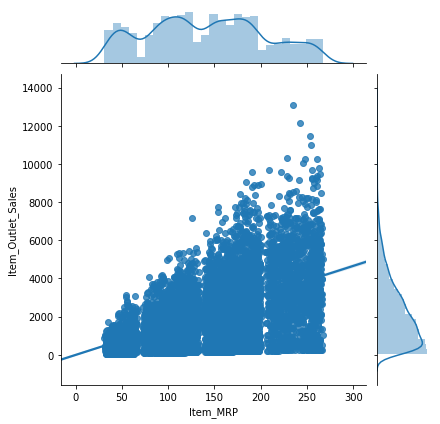

In [132]:
sns.jointplot(x=train_vis['Item_MRP'], y=train_vis['Item_Outlet_Sales'], data=train_vis, kind='reg')

In [137]:
x_train, x_test, y_train, y_test = train_test_split(X,train.Item_Outlet_Sales, test_size=0.2, random_state=12)
#x_train

In [138]:
y_train = pd.DataFrame(y_train, columns=['Item_Outlet_Sales'])
y_train = np.reshape(y_train, (-1,1))
y_test = pd.DataFrame(y_test, columns=['Item_Outlet_Sales'])
y_test = np.reshape(y_test, (-1,1))


In [139]:
# x_train = np.reshape(x_train, (-1,1))
# y_train = np.reshape(y_train, (-1,1))
# #x_train

In [140]:
def theta_calc(x_train, y_train):
    #Initializing all variables
    n_data = x_train.shape[0]
    bias = np.ones((n_data,1))
    x_train_b = np.append(bias, x_train, axis=1)
    #
    theta_1 = np.linalg.inv(np.dot(x_train_b.T,x_train_b))
    theta_2 = np.dot(theta_1, x_train_b.T)
    theta = np.dot(theta_2,y_train)
    #
    return theta

In [141]:
def predict_func(slope,intercept,x_test):
    #
    #pred = []
    #n_data = x_test.shape[0]
    #x_test.values.tolist()
    #for i in range(n_data):
    #    pred.append(((slope * x_test[i]) + intercept).tolist)
    #temp = np.dot(slope, x_test.T)
    pred = ((np.dot(x_test, slope)) + intercept)
        
    return pred

In [142]:
def mse_calc(prediction, y_test):
    #
    #total_data = len(prediction)
    #error = 0
    error = np.mean((prediction - y_test)**2)
    return error

In [143]:
def rsq(prediction, y_test):
    #
    #total_data = len(prediction)
    #Average of total prediction 
    y_avg = np.mean(y_test)
    #total sum of square error
    tot_err = np.sum((y_test-y_avg)**2)
    #total sum of squared error of residuals
    res_err = np.sum((y_test-prediction)**2)
    #
    r2 = 1 - (res_err / tot_err)
    return r2

In [144]:
#Finding optimal theta value using normal equations
theta = theta_calc(x_train, y_train)
intercept = theta[0]
slope = theta[1:]
print('Intercept of the model', intercept)
print('Slope of the model', slope)


Intercept of the model [107.94096452]
Slope of the model [[   15.42127913]
 [   11.98516145]
 [-4931.77786663]]


In [145]:
# x_test = np.reshape(x_cv, (-1,1))
# y_test = np.reshape(y_cv, (-1,1))
# (np.dot(slope, x_cv.T)) + intercept


In [146]:
#Prediction calculation
prediction = predict_func(slope, intercept, x_test)
#MSE calculation
error =  mse_calc(prediction, y_test)
print('Mean squared error of the model', error)
#R-square calculation
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)

Mean squared error of the model Item_Outlet_Sales    1.904820e+06
dtype: float64
R squared value Item_Outlet_Sales    0.34888
dtype: float64


In [164]:
#gradient descent 
def grad_descent(s_theta, l_rate, tolerance, iter_val, x_train, y_train):
    
    n_data = len(x_train)
    bias = np.ones((n_data,1))
    s_intercept = s_theta[0]
    s_slope = s_theta[1:]
    prediction = predict_func(s_slope, s_intercept, x_train)
    error =  mse_calc(prediction, y_train)
    x_train_b = np.append(bias, x_train, axis = 1) 
    
    for i in range(iter_val):
        #int_theta = [0 for i in range(len(x_train[0]) + 1)]
        #int_intercept = 0
        n_pt = float(len(x_train))
        
        prediction = predict_func(s_slope, s_intercept, x_train)
        #prev_error = error
        #for i in range(len(x_train)):
        
        #int_intercept = 2 / n_pt * np.dot(bias.T, (prediction - y_train))
        #int_slope = 2 / n_pt * np.dot(x_train.T, (prediction - y_train))
        
        int_theta = 2 / n_pt * np.dot(x_train_b.T, (prediction - y_train))
            
        #final_slope = s_slope - (l_rate * int_slope)
        #final_intercept = s_intercept - (l_rate * int_intercept)
        #s_slope = final_slope
        #s_intercept = final_intercept
        
        s_theta -=  l_rate * int_theta
        
        #prediction = predict_func(s_slope, s_intercept, x_train)
        #error = mse_calc(prediction, y_train)
        
        #if ((prev_error - error) / prev_error) <= tolerance:
        #    break
        
    s_intercept = s_theta[0]
    s_slope = s_theta[1:]
    prediction = predict_func(s_slope, s_intercept, x_train)
    final_error = mse_calc(prediction, y_train)
        
    return  s_theta, final_error

In [165]:
#defining slope and intercept value as 0 
learning_rate = 0.00001
start_theta = np.zeros((x_train.shape[1] + 1,1))
#start_intercept = 0
max_iteration = 500
tolerance = 0.01


In [166]:
# prediction = predict_func(start_slope, start_intercept, x_train)
# prediction
# y_train = np.reshape(y_train, (-1,1))
# error =  mse_calc(prediction, y_train)
# error

In [167]:
#intial run
grad_theta, grad_error = grad_descent(start_theta, learning_rate, tolerance, max_iteration, x_train, y_train)
grad_intercept = grad_theta[0]
grad_slope = grad_theta[1:]
prediction = predict_func(grad_slope, grad_intercept, x_test)
final_e_value = mse_calc(prediction, y_test)
#
print('Slope of the model', grad_slope)
print('Intercept of the model', grad_intercept)
print('Error value of the model', final_e_value)
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)
#Graph
# plt.scatter(x_test, y_test)
# plt.plot(x_test, prediction, color='blue', linewidth = 3)
# plt.xlabel("Input")
# plt.ylabel("Output")
# plt.show()

Slope of the model [[14.94147225]
 [ 4.21579033]
 [-0.1147019 ]]
Intercept of the model [-0.01714865]
Error value of the model Item_Outlet_Sales    1.952803e+06
dtype: float64
R squared value Item_Outlet_Sales    0.332477
dtype: float64


In [168]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(x_train,y_train)
pred = lreg.predict(x_test)
mse = np.mean((pred - y_test)**2)
mse

Item_Outlet_Sales    1.904820e+06
dtype: float64

In [169]:
lreg.intercept_

array([107.94096452])

In [170]:
lreg.coef_

array([[   15.42127913,    11.98516145, -4931.77786663]])